In [1]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats
import variables
#import matplotlib as mpl
#import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
working on MBP13


## aroma funcs

In [4]:
# import aroma output and cleanup format
subject = '0183726'
df = pd.read_table('/Users/franzliem/Desktop/test_data/wd/ds/rsfMRI_preproc_wf/aroma/_TR_id_645/0183726/_fwhm_0/run_aroma/classification_overview.txt', 
                  delimiter="\s", 
                skiprows=1, 
                names=['IC', 'is_motion', 'junk', 'max_rp_corr', 'junk', 'junk', 'edge_fract', 'junk', 'junk', 'hf_content', 'junk', 'junk', 'csf_fract'])
df = df.drop('junk',1)

/usr/local/lib/python2.7/site-packages/pandas/io/parsers.py:644: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


,subject,n_ic,n_clean,n_motion
0,0183726,102,40,62


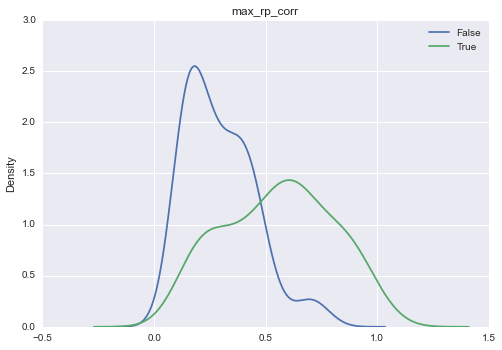

In [5]:
# mean and sd separaded by group
ic_class = df.groupby('is_motion')
ic_class_mean = ic_class.aggregate(np.mean)
ic_class_sd = ic_class.aggregate(np.std)

ic_class.max_rp_corr.plot(kind='density',  legend=True, title='max_rp_corr')
ic_class_mean

ic_class_count = df.groupby('is_motion').count()
n_ic = df.IC.max()
n_motion = ic_class_count.IC[True]
n_clean = ic_class_count.IC[False]
df_out = pd.DataFrame([[subject, n_ic, n_clean, n_motion]], columns=['subject', 'n_ic', 'n_clean', 'n_motion'])
df_out

In [6]:
print ic_class['max_rp_corr']
#(df['max_rp_corr'])

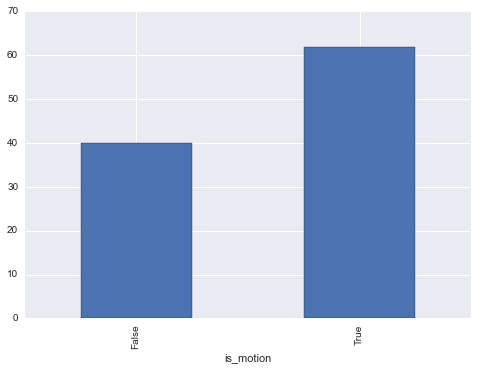

In [7]:
ic_class_count.IC.plot(kind='bar')